In [19]:
import cv2
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt

CATEGORIES = ["Dog", "Cat"]  # will use this to convert prediction num to string value
path = 'data/MyDogs/'
IMG_SIZE = 128  # 50 in txt-based

# def prepare(filepath):
#     pics = []
#     for img in os.listdir(filepath):
#         img_array = cv2.imread(os.path.join(filepath, img), cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
#         new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
#         pics.append(new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1))  # return the image with shaping that TF wants.
#     return pics

def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

In [2]:
model = keras.models.load_model("models/3-conv-32-nodes0-dense.model")

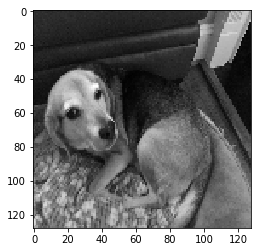

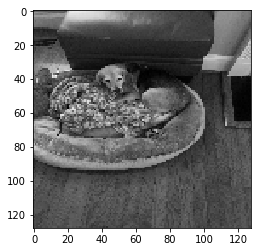

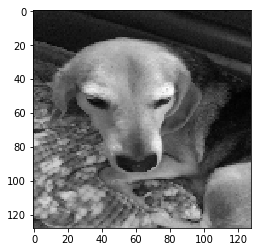

In [13]:
# Let's take a look at my ole dog Norman
for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_array, cmap='gray')
    plt.show()

In [42]:
pics = []
for pic in range(1,15):
    pics.append("{}.jpg".format(pic))
    
predictions = {}
for pic in pics:
    predictions[pic] = model.predict([prepare(os.path.join(path, pic))])

# REMEMBER YOU'RE PASSING A LIST OF THINGS YOU WISH TO PREDICT

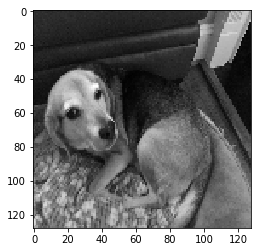

Dog


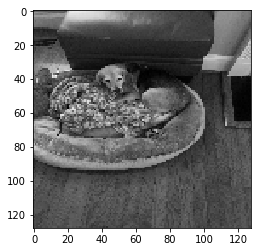

Dog


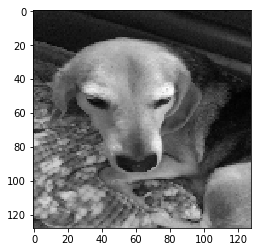

Dog


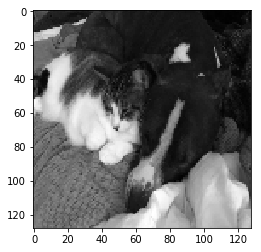

Cat


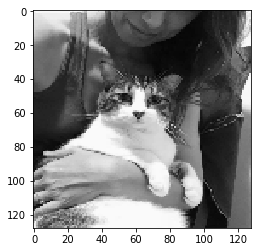

Cat


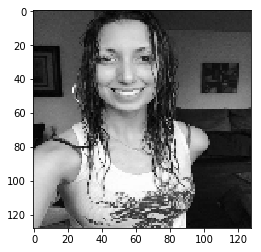

Cat


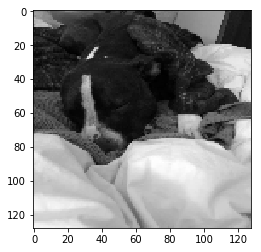

Dog


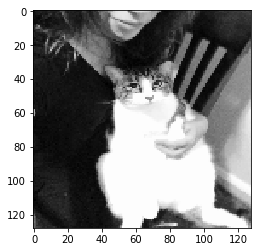

Cat


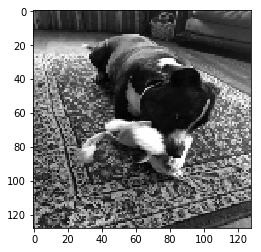

Dog


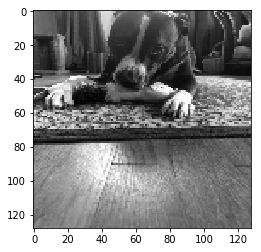

Cat


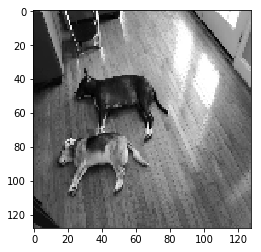

Dog


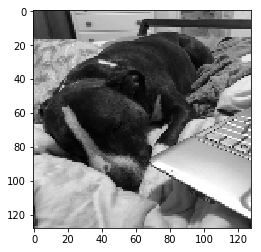

Dog


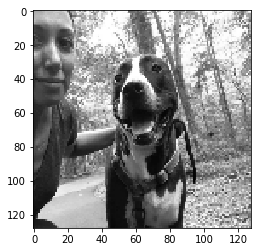

Dog


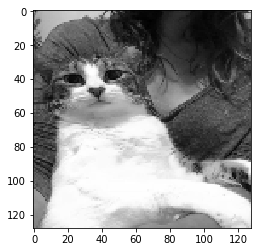

Cat


In [43]:
def read_img(path):
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return plt.imshow(img_array, cmap='gray')

for key, val in predictions.items():
    plt.show(read_img(os.path.join(path, key)))
    print(CATEGORIES[int(val)])